In [2]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.metrics import roc_curve,roc_auc_score

In [3]:
df = pd.read_csv(r'D:\project\Test set.csv')

In [4]:
df

,Height,Weight,Sex
0,146.323241,59.861065,Female
1,175.695412,77.863687,Male
2,183.216164,72.131992,Male
3,184.245269,77.546000,Male
4,132.302261,55.188496,Female
...,...,...,...
200,155.090314,77.248911,Female
201,149.175907,93.231692,Male
202,168.030874,63.640623,Female
203,172.608090,55.189983,Male


In [5]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])


In [6]:
df.head()

,Height,Weight,Sex
0,146.323241,59.861065,0
1,175.695412,77.863687,1
2,183.216164,72.131992,1
3,184.245269,77.546000,1
4,132.302261,55.188496,0


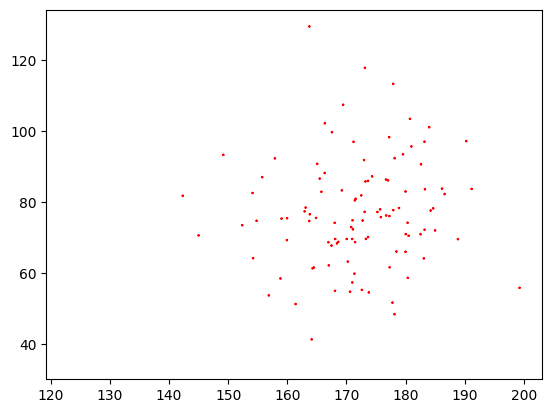

In [7]:
plt.scatter(df.Height,df.Weight,df.Sex,marker='*',color='red')

In [8]:
df.shape

(205, 3)

In [9]:
from sklearn.model_selection import train_test_split
X = df[['Height','Weight']]
Y = df['Sex']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [10]:
X_train

,Height,Weight
181,190.261615,97.102525
82,160.018063,47.574375
38,152.944765,47.806605
51,164.269223,61.265592
3,184.245269,77.546000
...,...,...
102,143.920048,64.635992
18,172.980648,91.765067
97,147.208821,71.914709
140,173.213002,85.737215


In [11]:
Y_train


181    1
82     0
38     0
51     1
3      1
      ..
102    0
18     1
97     0
140    1
49     0
Name: Sex, Length: 164, dtype: int64

In [12]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [13]:
model.fit(X_train, Y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [14]:
model.predict(X_test)

array([0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1])

In [15]:
model.score(X_test,Y_test)

0.7804878048780488

In [16]:
model.predict_proba(X_test)

array([[9.89451582e-01, 1.05484183e-02],
       [1.16418850e-01, 8.83581150e-01],
       [2.52234202e-02, 9.74776580e-01],
       [2.07918497e-01, 7.92081503e-01],
       [9.47265226e-01, 5.27347738e-02],
       [2.39440618e-01, 7.60559382e-01],
       [9.98080519e-01, 1.91948052e-03],
       [9.85634838e-01, 1.43651616e-02],
       [9.58182730e-03, 9.90418173e-01],
       [1.63643021e-02, 9.83635698e-01],
       [5.72104937e-01, 4.27895063e-01],
       [9.97841032e-01, 2.15896825e-03],
       [8.53342899e-01, 1.46657101e-01],
       [3.32251280e-02, 9.66774872e-01],
       [7.91527331e-01, 2.08472669e-01],
       [9.73152625e-01, 2.68473750e-02],
       [8.92365087e-01, 1.07634913e-01],
       [9.19310647e-01, 8.06893525e-02],
       [9.96076246e-01, 3.92375385e-03],
       [7.09412830e-03, 9.92905872e-01],
       [8.78694414e-01, 1.21305586e-01],
       [8.28671697e-01, 1.71328303e-01],
       [5.12690299e-02, 9.48730970e-01],
       [9.76378788e-01, 2.36212120e-02],
       [1.911405

In [17]:
y_pred = model.predict_proba(X_test)[::,1]

fpr, tpr, _ = roc_curve(Y_test,  y_pred)

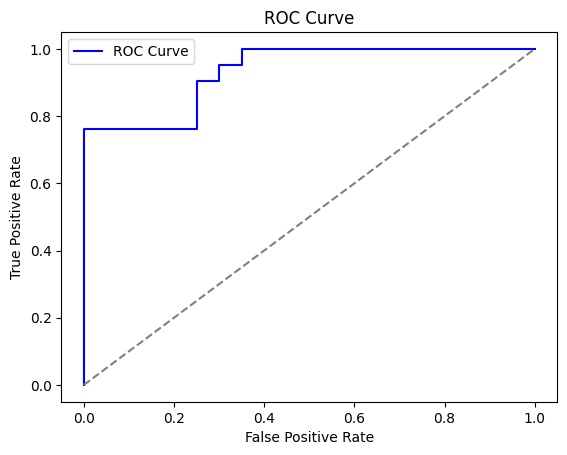

In [18]:
plt.plot(fpr, tpr, color='blue', label='ROC Curve')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


In [19]:
auc = roc_auc_score(Y_test, y_pred)
print("AUC Score:", auc)

AUC Score: 0.9333333333333333
